# Exploratory Data Analysis

### Summary of tasks covered
1. Importing and analysing data present with charts and graphs
2. Feature selection and encoding categorical variables
3. Training a basic random forest regressor on the encoded data
4. Using grid search to find the best hyperparameters

In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [170]:
data = pd.read_csv('../data/bank.csv')
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no


In [171]:
data.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4964,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4964,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4964,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4964,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4964,no


In [172]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [173]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,41188.0,NaN,NaN,NaN,40.02406,10.42125,17.0,32.0,38.0,47.0,98.0
job,41188,12,admin.,10422,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,41188,4,married,24928,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,41188,8,university.degree,12168,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default,41188,3,no,32588,NaN,NaN,NaN,NaN,NaN,NaN,NaN
housing,41188,3,yes,21576,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan,41188,3,no,33950,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contact,41188,2,cellular,26144,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,41188,10,may,13769,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day_of_week,41188,5,thu,8623,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [192]:
# Drop duplicates
duplicates = data.duplicated()
print(duplicates.sum())
data.drop_duplicates(inplace=True)
data['pdays'] = data['pdays'].replace(999, 0)

0


In [193]:
cat_cols = data.select_dtypes(include=['object']).columns
num_cols = data.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index([], dtype='object')
Numerical Variables:
['age', 'duration', 'pdays', 'previous', 'cons.price.idx', 'nr.employed', 'y_encoded', 'job_freq_encode', 'education_encoded', 'month_sin', 'month_cos', 'day_sin', 'day_cos', 'loan_0', 'loan_1', 'housing_0', 'housing_1', 'default_0', 'default_1']


age
Skew : 0.78


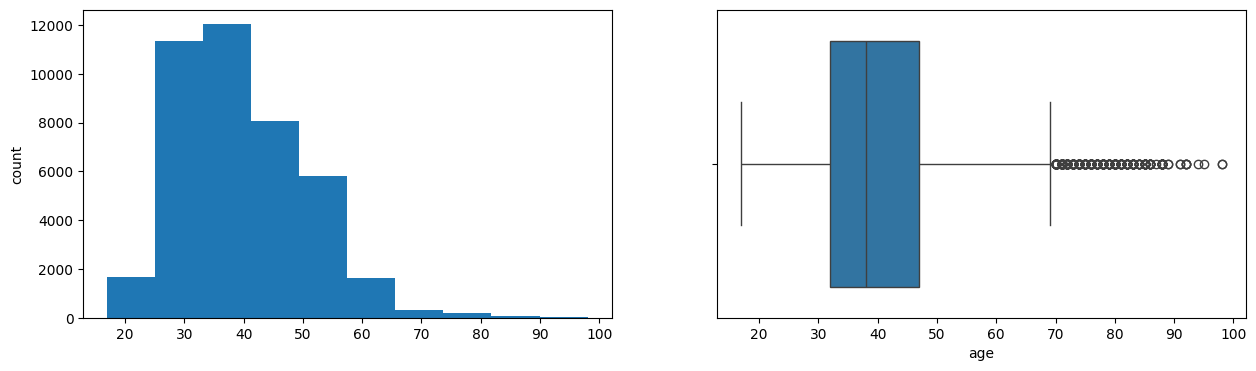

duration
Skew : 3.26


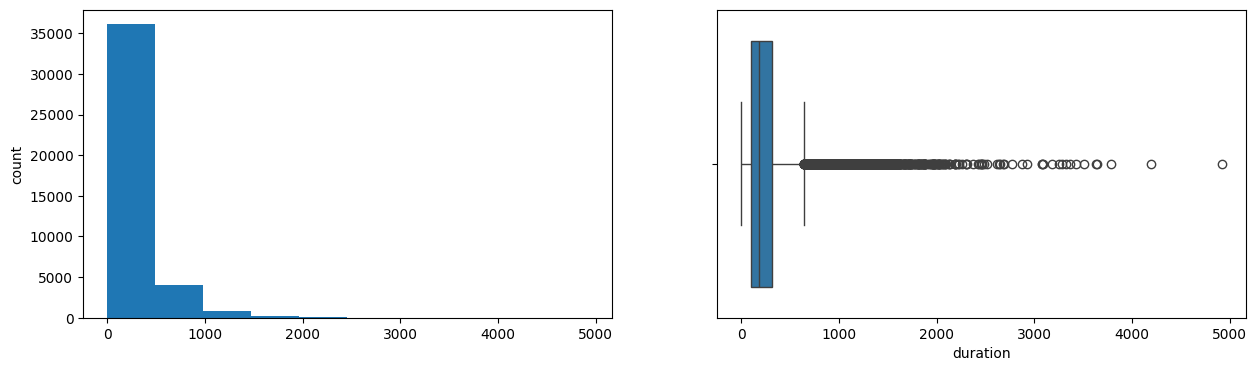

pdays
Skew : 7.94


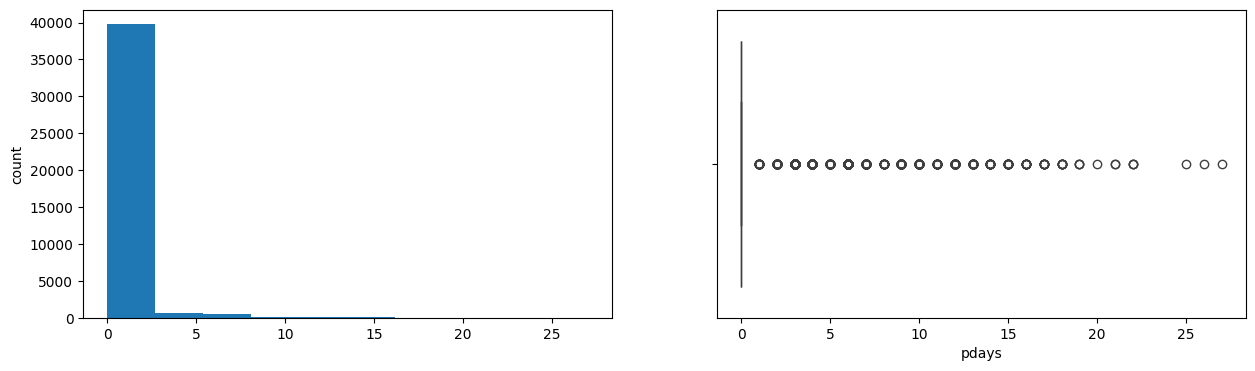

previous
Skew : 3.83


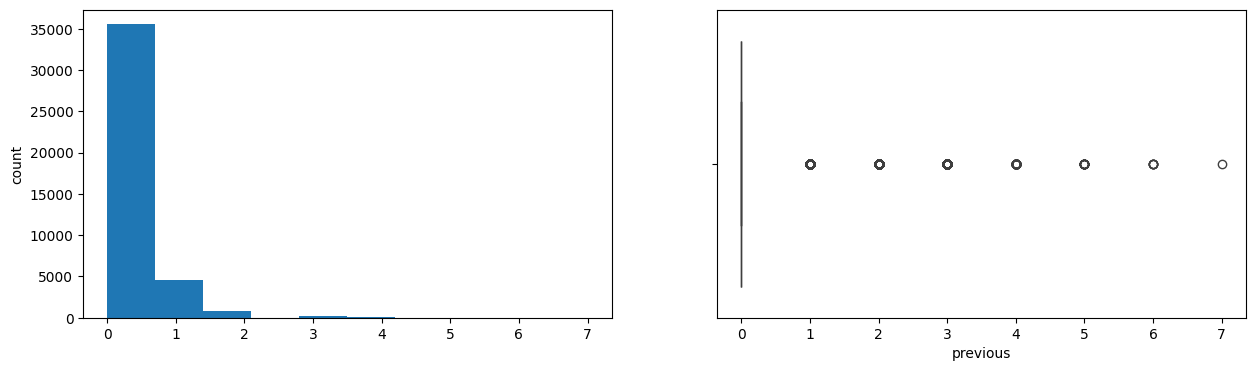

cons.price.idx
Skew : -0.23


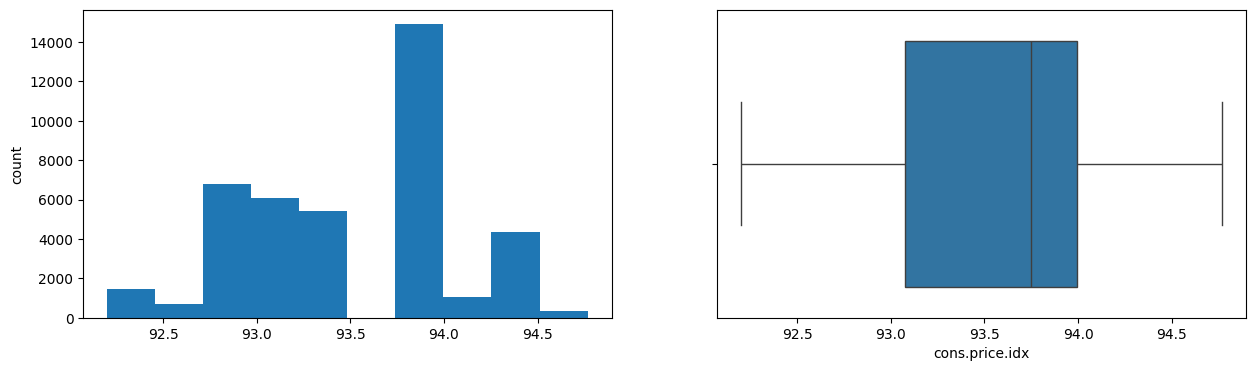

nr.employed
Skew : -1.04


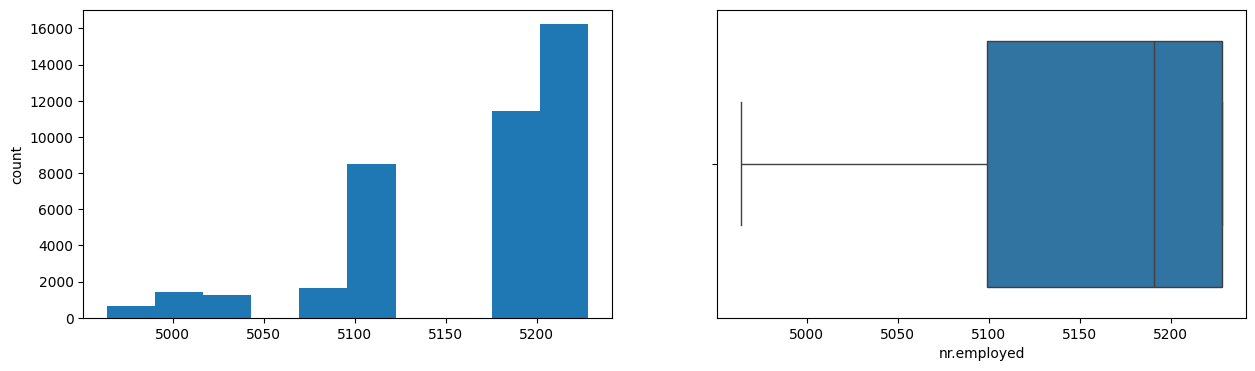

y_encoded
Skew : 2.45


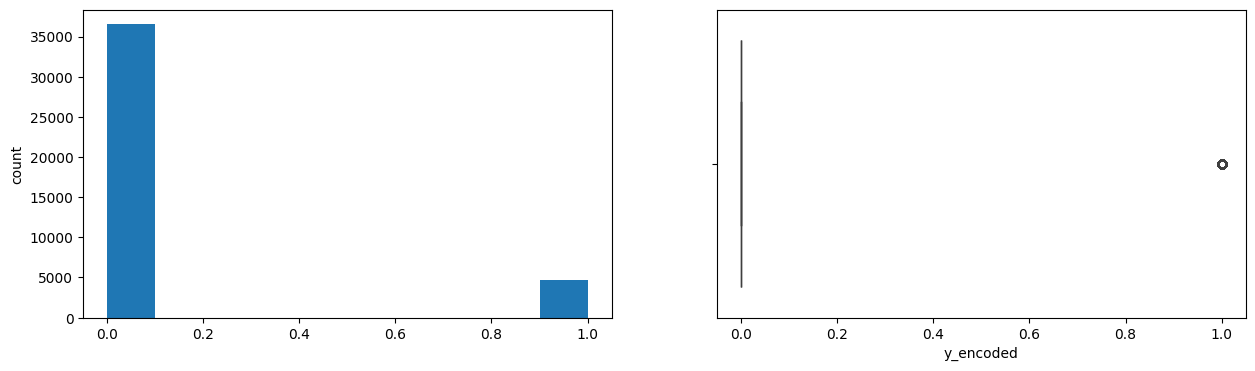

job_freq_encode
Skew : -0.42


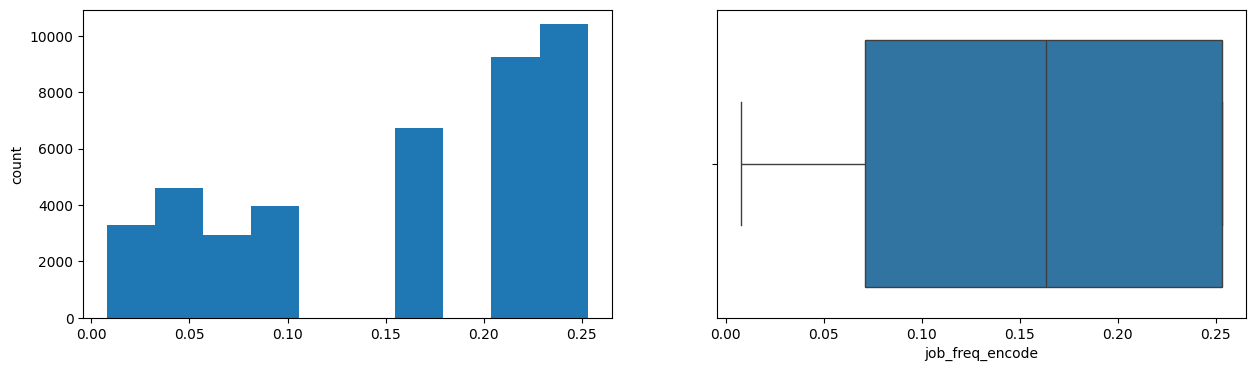

education_encoded
Skew : -0.58


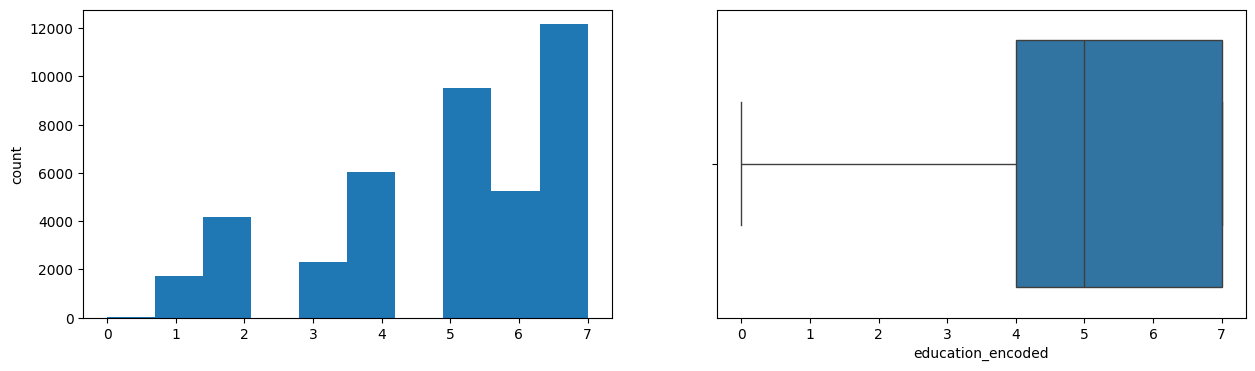

month_sin
Skew : 0.01


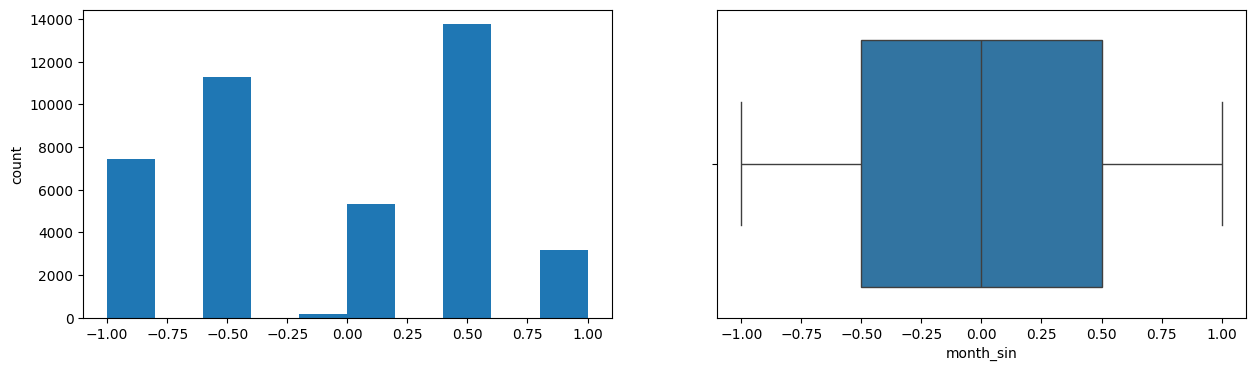

month_cos
Skew : 1.82


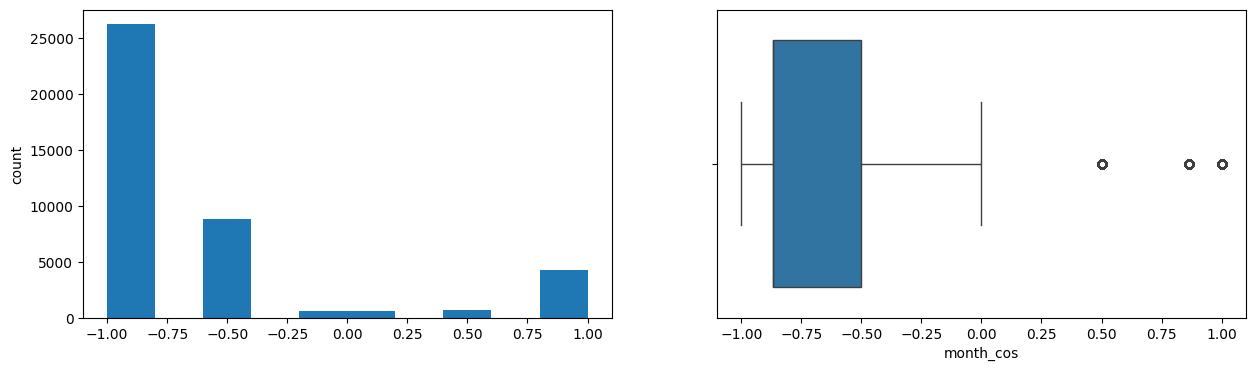

day_sin
Skew : -0.41


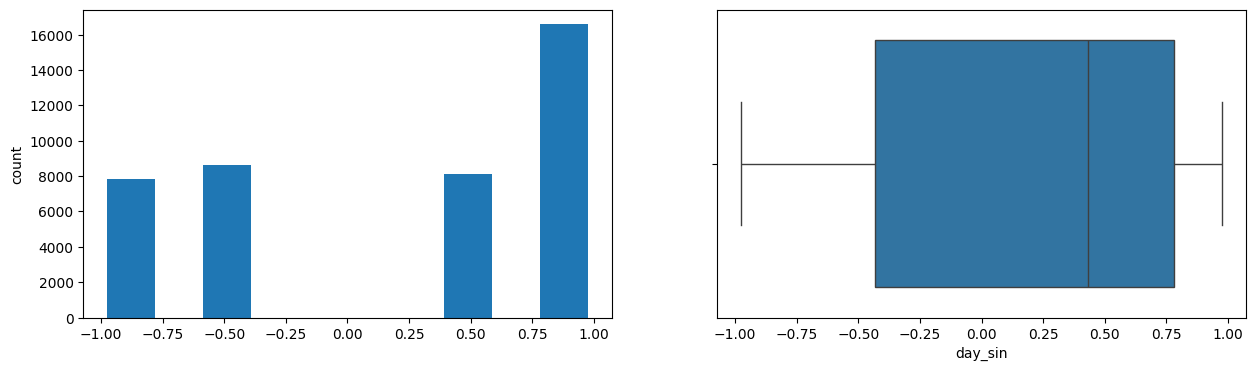

day_cos
Skew : 0.53


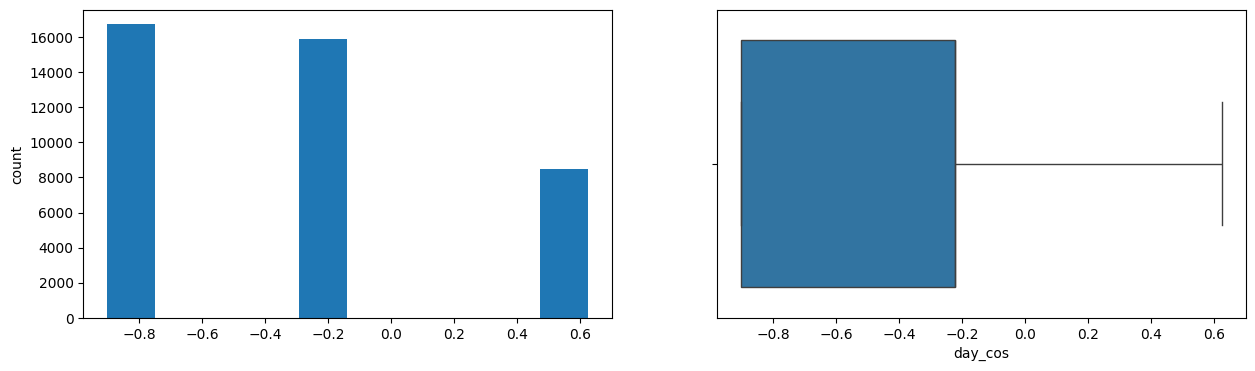

loan_0
Skew : 1.7


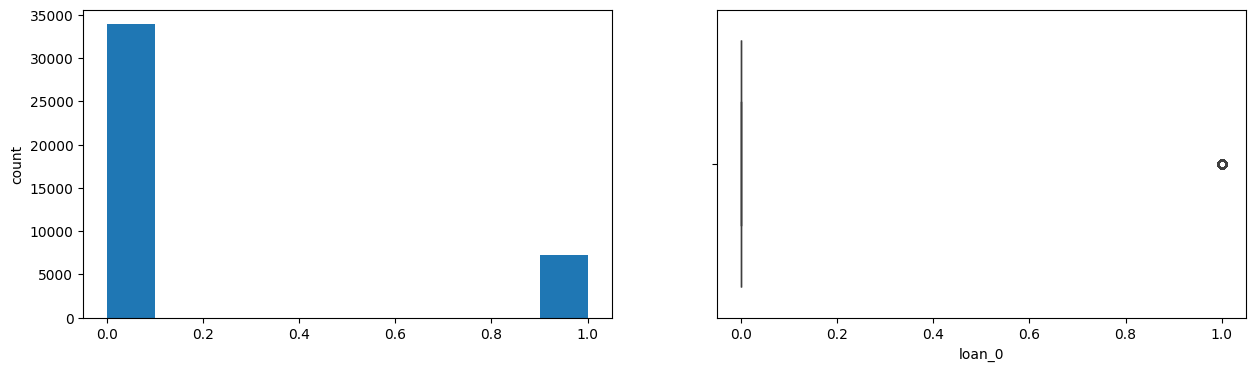

loan_1
Skew : -1.94


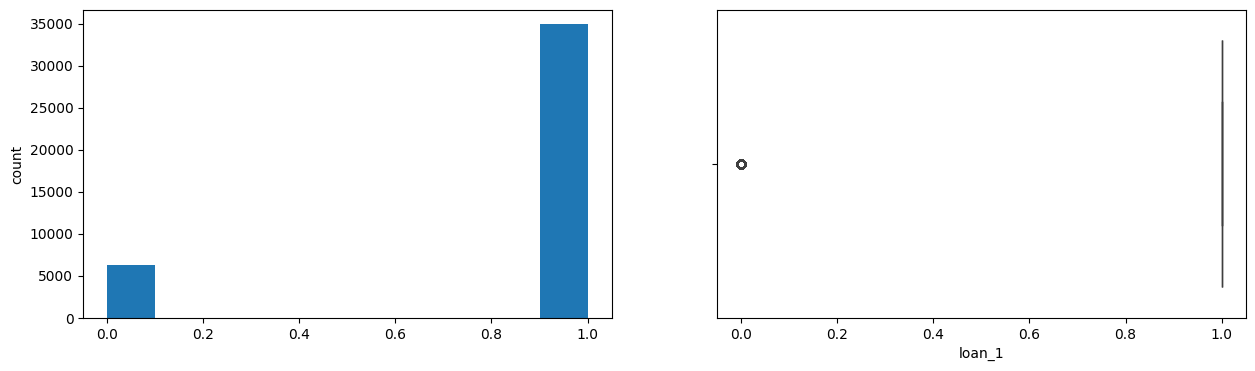

housing_0
Skew : -0.19


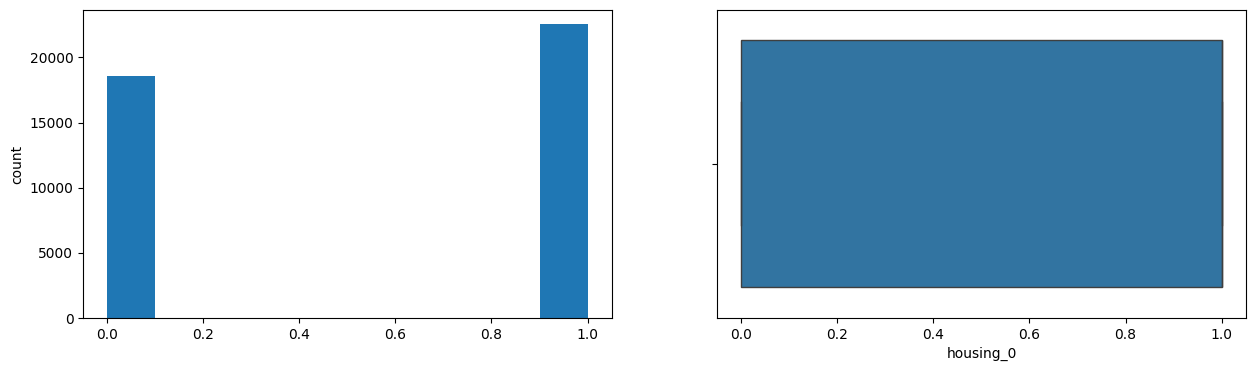

housing_1
Skew : 0.1


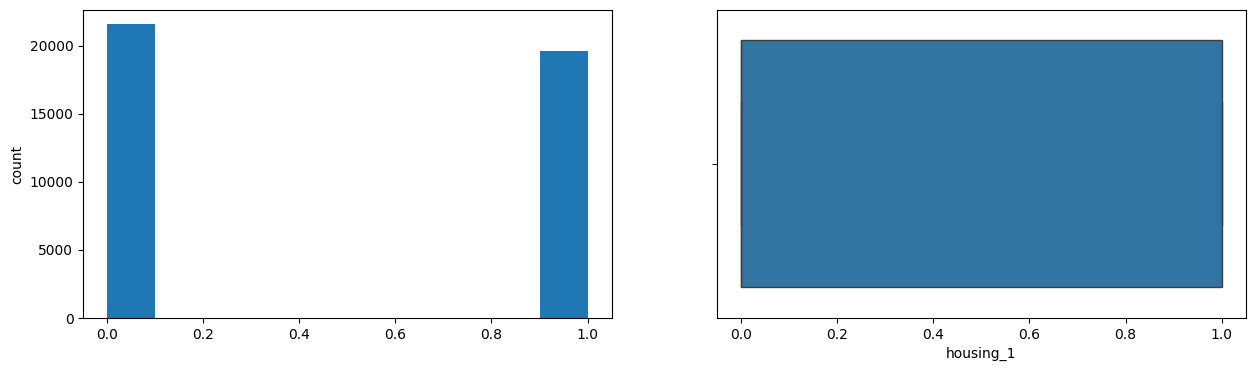

default_0
Skew : 1.43


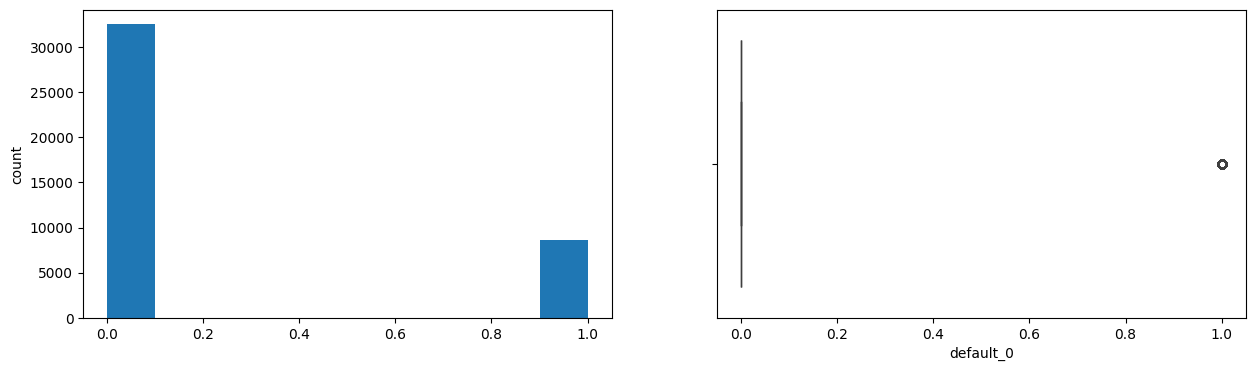

default_1
Skew : -1.43


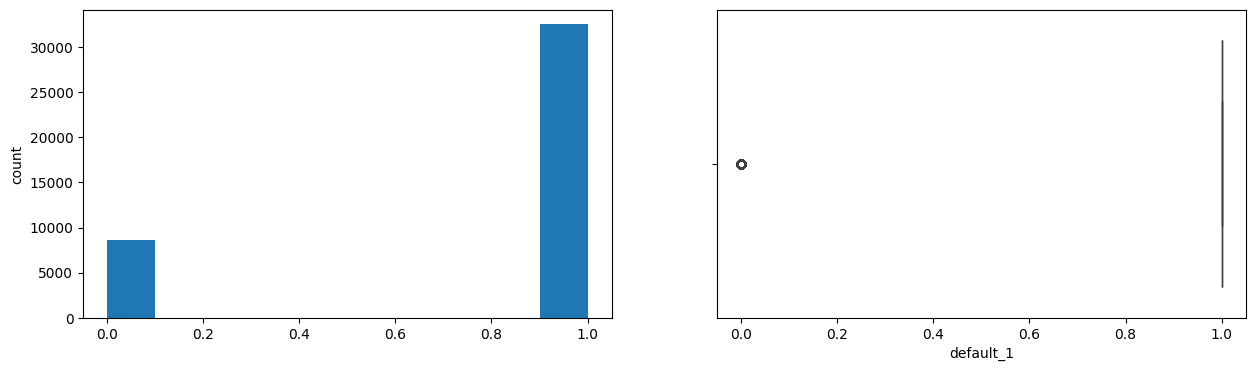

In [194]:
for col in num_cols:
    print(col)
    print('Skew :', round(data[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    data[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col])
    plt.show()

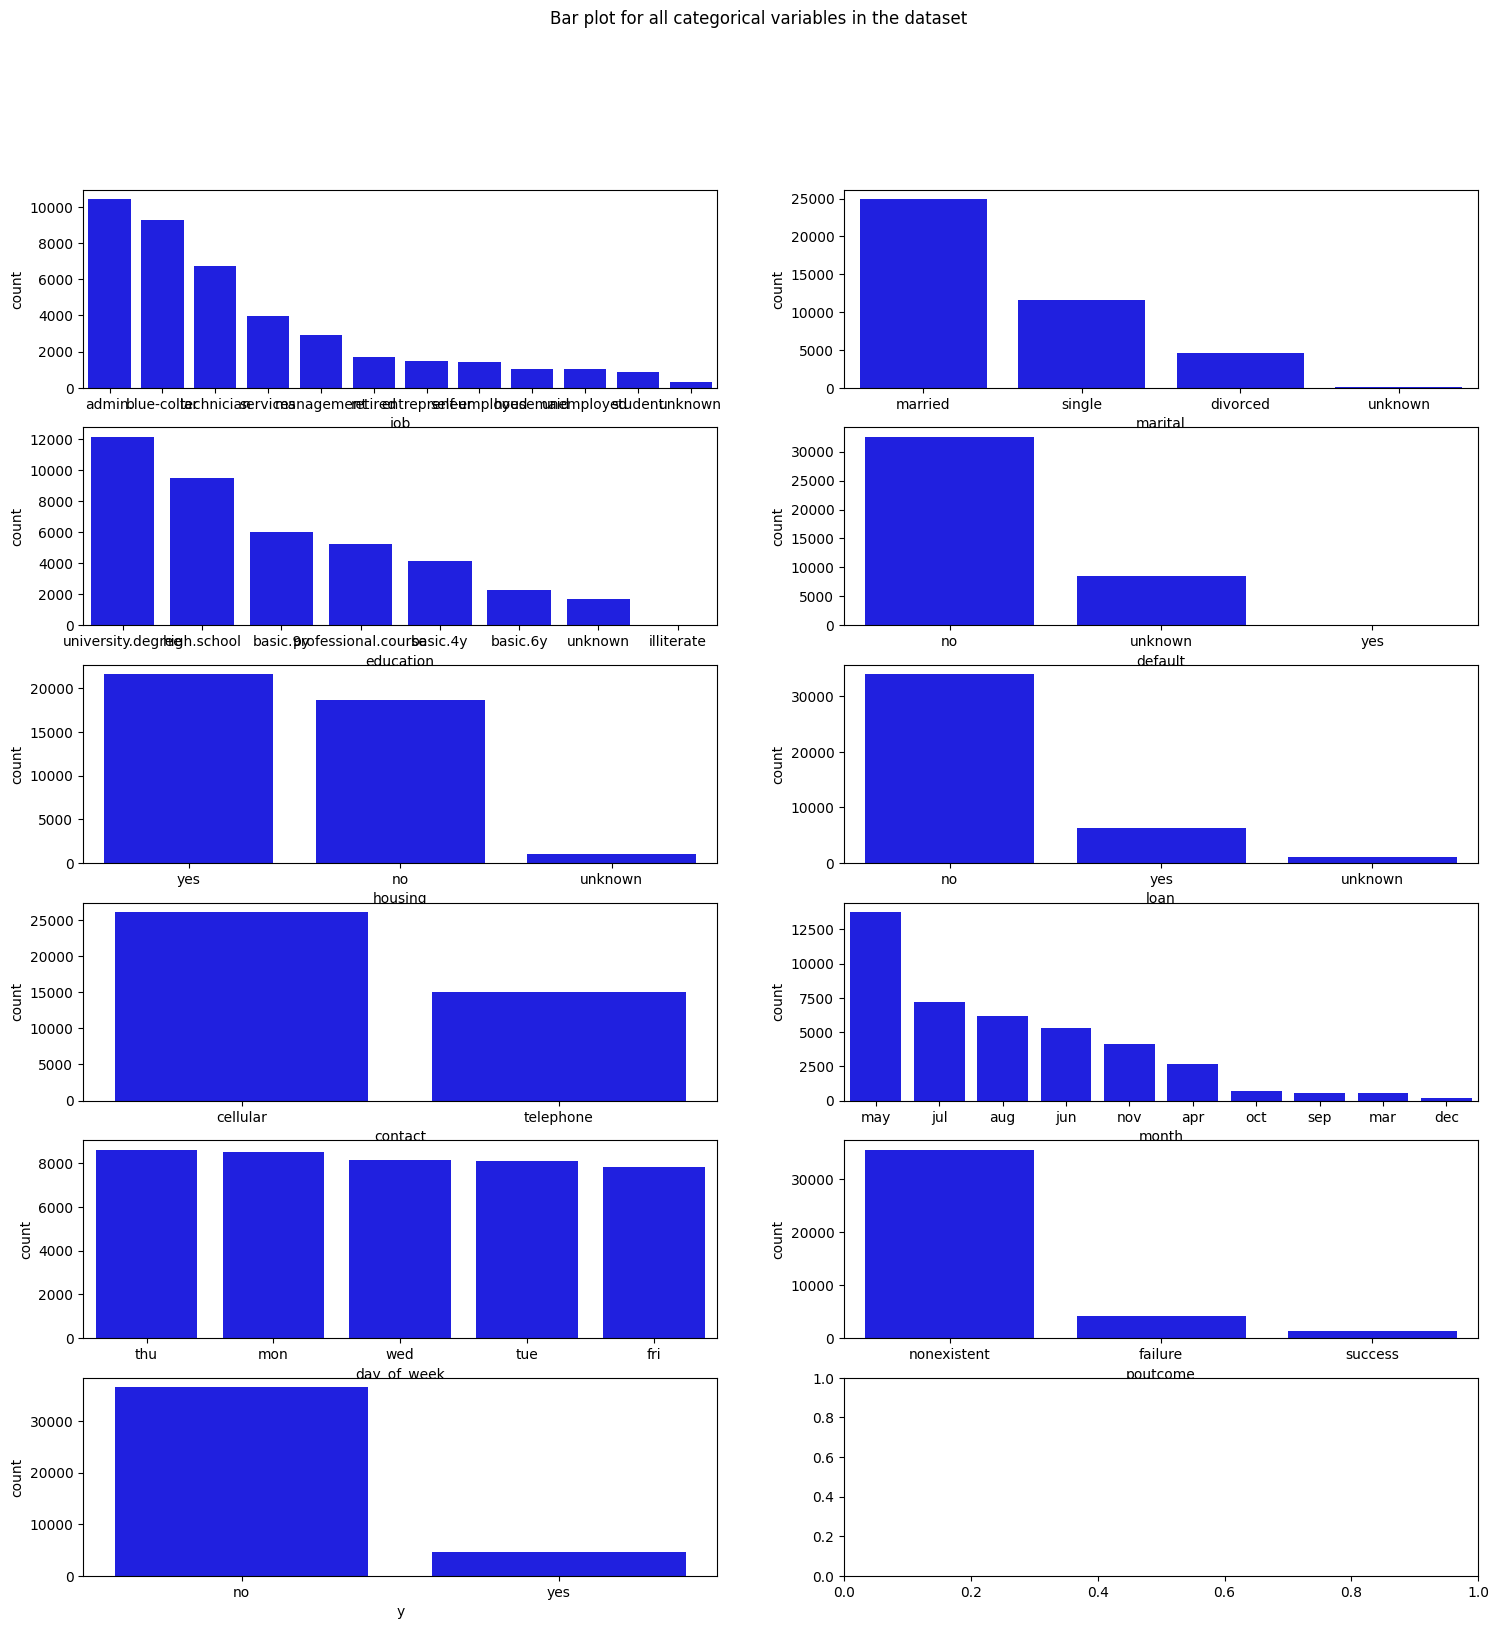

In [177]:
fig, axes = plt.subplots(6, 2, figsize = (18, 18))
fig.suptitle('Bar plot for all categorical variables in the dataset')
sns.countplot(ax = axes[0, 0], x = 'job', data = data, color = 'blue', 
              order = data['job'].value_counts().index);
sns.countplot(ax = axes[0, 1], x = 'marital', data = data, color = 'blue', 
              order = data['marital'].value_counts().index);
sns.countplot(ax = axes[1, 0], x = 'education', data = data, color = 'blue', 
              order = data['education'].value_counts().index);
sns.countplot(ax = axes[1, 1], x = 'default', data = data, color = 'blue', 
              order = data['default'].value_counts().index);
sns.countplot(ax = axes[2, 0], x = 'housing', data = data, color = 'blue', 
              order = data['housing'].value_counts().index);
sns.countplot(ax = axes[2, 1], x = 'loan', data = data, color = 'blue', 
              order = data['loan'].value_counts().index);
sns.countplot(ax = axes[3, 0], x = 'contact', data = data, color = 'blue', 
              order = data['contact'].value_counts().index);
sns.countplot(ax = axes[3, 1], x = 'month', data = data, color = 'blue', 
              order = data['month'].value_counts().index);
sns.countplot(ax = axes[4, 0], x = 'day_of_week', data = data, color = 'blue', 
              order = data['day_of_week'].value_counts().index);
sns.countplot(ax = axes[4, 1], x = 'poutcome', data = data, color = 'blue', 
              order = data['poutcome'].value_counts().index);
sns.countplot(ax = axes[5, 0], x = 'y', data = data, color = 'blue', 
              order = data['y'].value_counts().index);

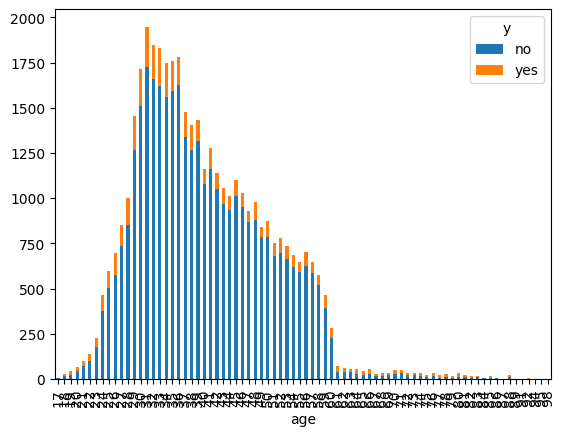

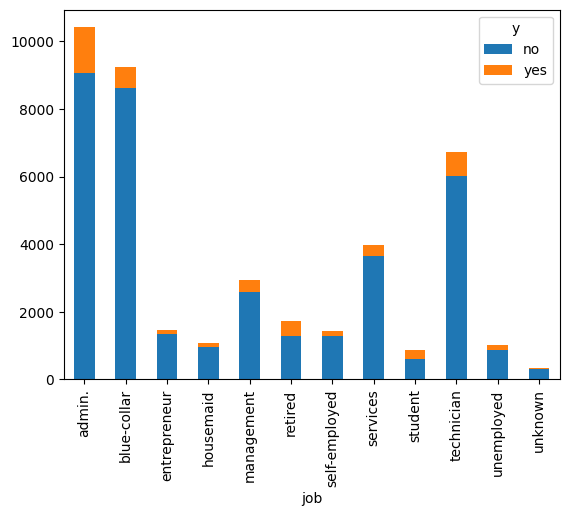

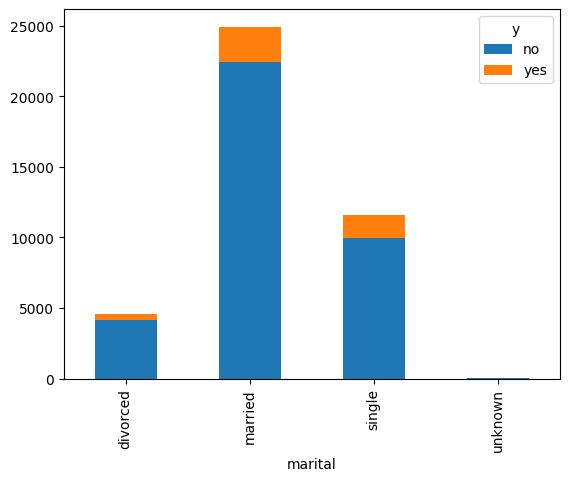

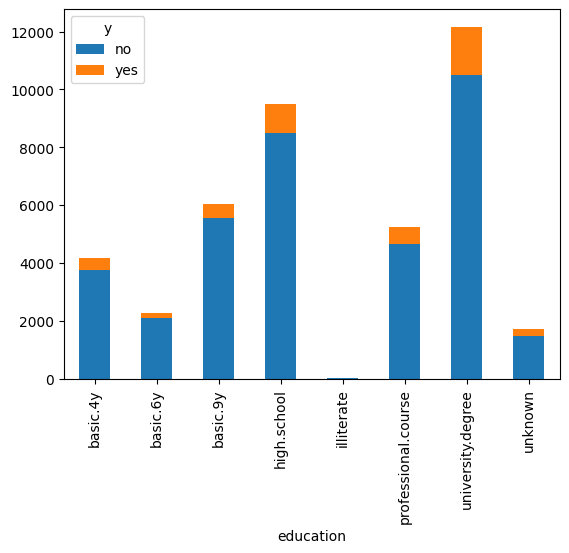

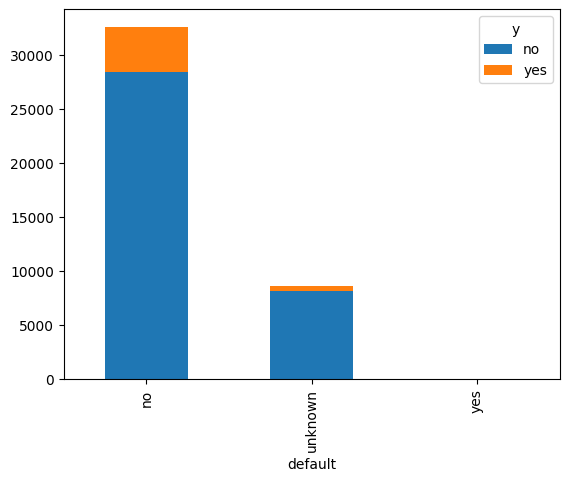

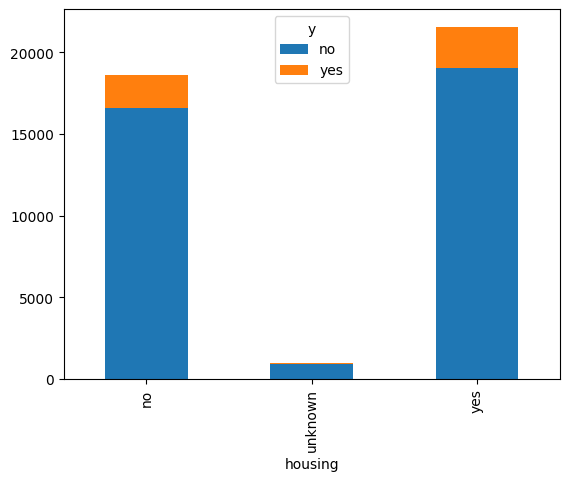

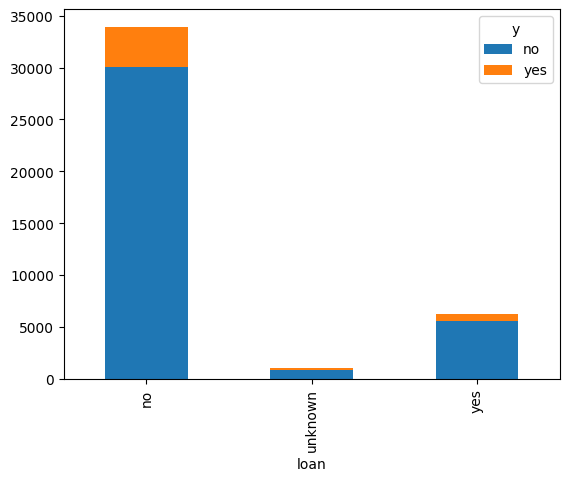

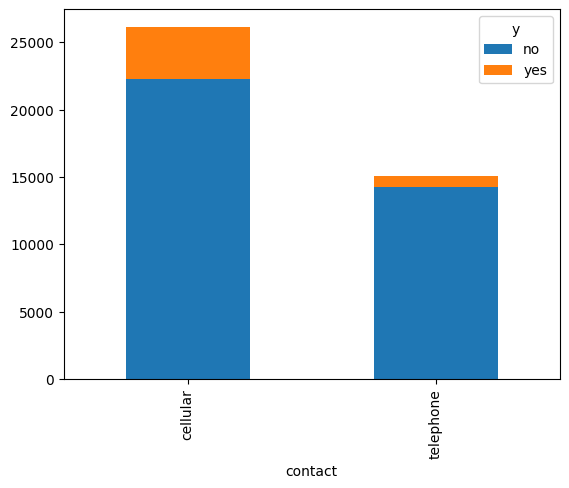

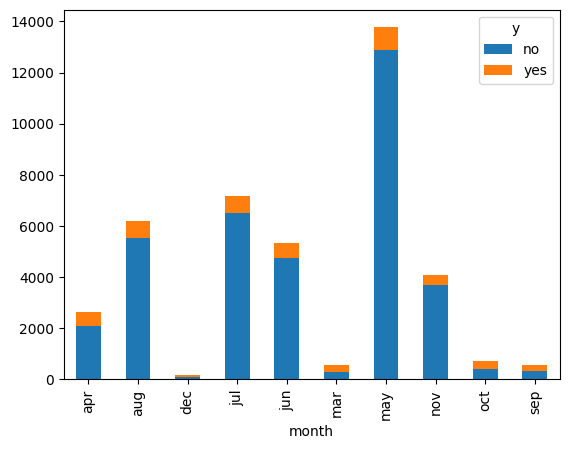

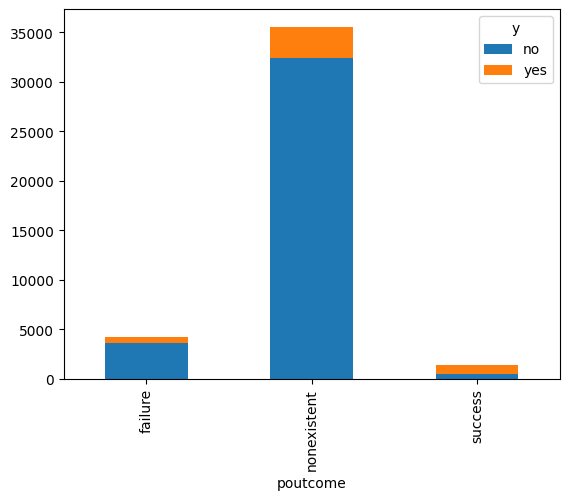

In [178]:
for i in ['age', 'job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact', 'month','poutcome']:
    data.groupby([i, 'y']).size().unstack().plot(kind='bar', stacked=True)

                     age  duration  campaign     pdays  previous  \
age             1.000000 -0.000808  0.004622 -0.034381  0.024379   
duration       -0.000808  1.000000 -0.071765 -0.047556  0.020600   
campaign        0.004622 -0.071765  1.000000  0.052606 -0.079182   
pdays          -0.034381 -0.047556  0.052606  1.000000 -0.587508   
previous        0.024379  0.020600 -0.079182 -0.587508  1.000000   
emp.var.rate   -0.000242 -0.027941  0.150786  0.271063 -0.420587   
cons.price.idx  0.001009  0.005303  0.127826  0.078920 -0.203197   
cons.conf.idx   0.129075 -0.008126 -0.013657 -0.091374 -0.050929   
euribor3m       0.010852 -0.032861  0.135169  0.296946 -0.454571   
nr.employed    -0.017404 -0.044646  0.144046  0.372368 -0.501200   
y_encoded       0.030381  0.405297 -0.066361 -0.324948  0.230202   

                emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
age                -0.000242        0.001009       0.129075   0.010852   
duration           -0.027941       

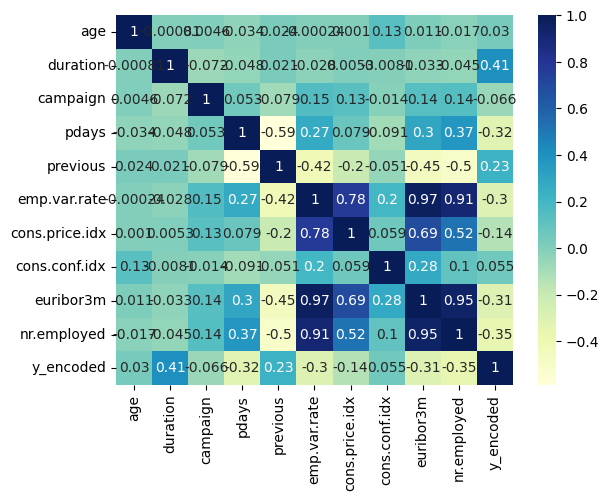

In [ ]:
# Using ordinal encoding for y
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder(categories=[['no','yes']])
data['y_encoded'] = encoder.fit_transform(data[['y']])
print(data.corr(numeric_only=True))
dataplot = sns.heatmap(data.corr(numeric_only=True), cmap='YlGnBu', annot=True)

In [180]:
data = data.drop(['campaign','cons.conf.idx','emp.var.rate','euribor3m'],axis=1)

## Encoding categorical variables
One hot encoding: marital, poutcome, contact

Frequency encoding: job

Binary encoding: loan, housing, default, y

Ordinal encoding: education

sin/cosine encoding: month, day_of_week

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   41176 non-null  int64  
 1   duration              41176 non-null  int64  
 2   pdays                 41176 non-null  int64  
 3   previous              41176 non-null  int64  
 4   cons.price.idx        41176 non-null  float64
 5   nr.employed           41176 non-null  int64  
 6   y_encoded             41176 non-null  float64
 7   job_freq_encode       41176 non-null  float64
 8   education_encoded     41176 non-null  float64
 9   month_sin             41176 non-null  float64
 10  month_cos             41176 non-null  float64
 11  day_sin               41176 non-null  float64
 12  day_cos               41176 non-null  float64
 13  loan_0                41176 non-null  int64  
 14  loan_1                41176 non-null  int64  
 15  housing_0             41

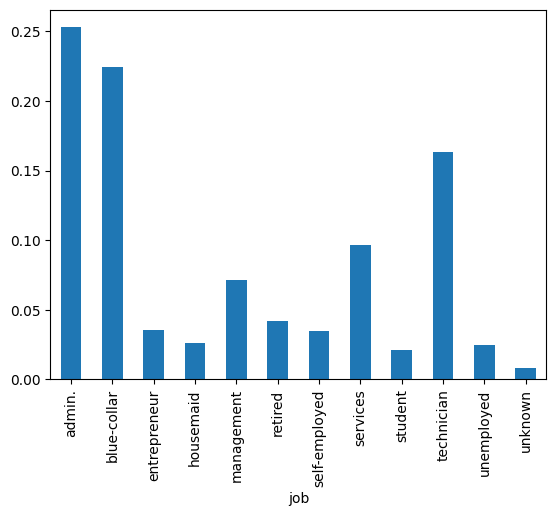

In [181]:
# Using dummy encoding to encode marital, poutcome, contact
to_dummy_cols = pd.DataFrame(data[['marital', 'poutcome','contact']])
dummy_cols = pd.get_dummies(to_dummy_cols)
data = data.replace({'pdays' : '999'}, {'pdays' : 0})


# Using binary encoding for loan, housing, default, y
from category_encoders import BinaryEncoder 
encoder = BinaryEncoder(cols =['loan', 'housing', 'default']) 
# Transforming the column after fitting
newdata = encoder.fit_transform(data[['loan', 'housing', 'default']])

# Using frequency encoding for job
fq = data.groupby('job').size()/len(data)
# Mapping values to dataframe
data.loc[:, "{}_freq_encode".format('job')] = data['job'].map(fq)
fq.plot.bar(stacked=True)

# Using ordinal encoding for education
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder(categories=[["illiterate","unknown","basic.4y","basic.6y","basic.9y","high.school","professional.course","university.degree"]])
data['education_encoded'] = encoder.fit_transform(data[['education']])

# Sin/cosine encoding for month, day_of_week
# Map categorical values to numerical values
month_mapping = {month: i+1 for i, month in enumerate(['jan', 'feb', 'mar', 'apr', 'may', 'jun', 
                                                       'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])}
day_mapping = {day: i+1 for i, day in enumerate(['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun'])}

data['month_num'] = data['month'].map(month_mapping)
data['day_num'] = data['day_of_week'].map(day_mapping)

# Sine and Cosine Encoding
data['month_sin'] = np.sin(2 * np.pi * data['month_num'] / 12)
data['month_cos'] = np.cos(2 * np.pi * data['month_num'] / 12)
data['day_sin'] = np.sin(2 * np.pi * data['day_num'] / 7)
data['day_cos'] = np.cos(2 * np.pi * data['day_num'] / 7)


# concatenating dataframe
data = pd.concat([data, newdata, dummy_cols], axis = 1) 
# dropping old column 
data = data.drop(['loan', 'housing', 'default','y','marital', 'poutcome','contact','job','month', 'day_of_week', 'month_num', 'day_num','education'], axis = 1)

data.info()

                           age  duration     pdays  previous  cons.price.idx  \
age                   1.000000 -0.000808 -0.034381  0.024379        0.001009   
duration             -0.000808  1.000000 -0.047556  0.020600        0.005303   
pdays                -0.034381 -0.047556  1.000000 -0.587508        0.078920   
previous              0.024379  0.020600 -0.587508  1.000000       -0.203197   
cons.price.idx        0.001009  0.005303  0.078920 -0.203197        1.000000   
nr.employed          -0.017404 -0.044646  0.372368 -0.501200        0.522363   
y_encoded             0.030381  0.405297 -0.324948  0.230202       -0.136134   
job_freq_encode      -0.170764 -0.005460  0.043410 -0.042580        0.021305   
education_encoded    -0.184601 -0.016151 -0.025435  0.020970       -0.098283   
month_sin            -0.066111  0.025520  0.054826  0.024332       -0.014551   
month_cos             0.081967 -0.004825 -0.118965  0.177064       -0.389035   
day_sin               0.014024 -0.002439

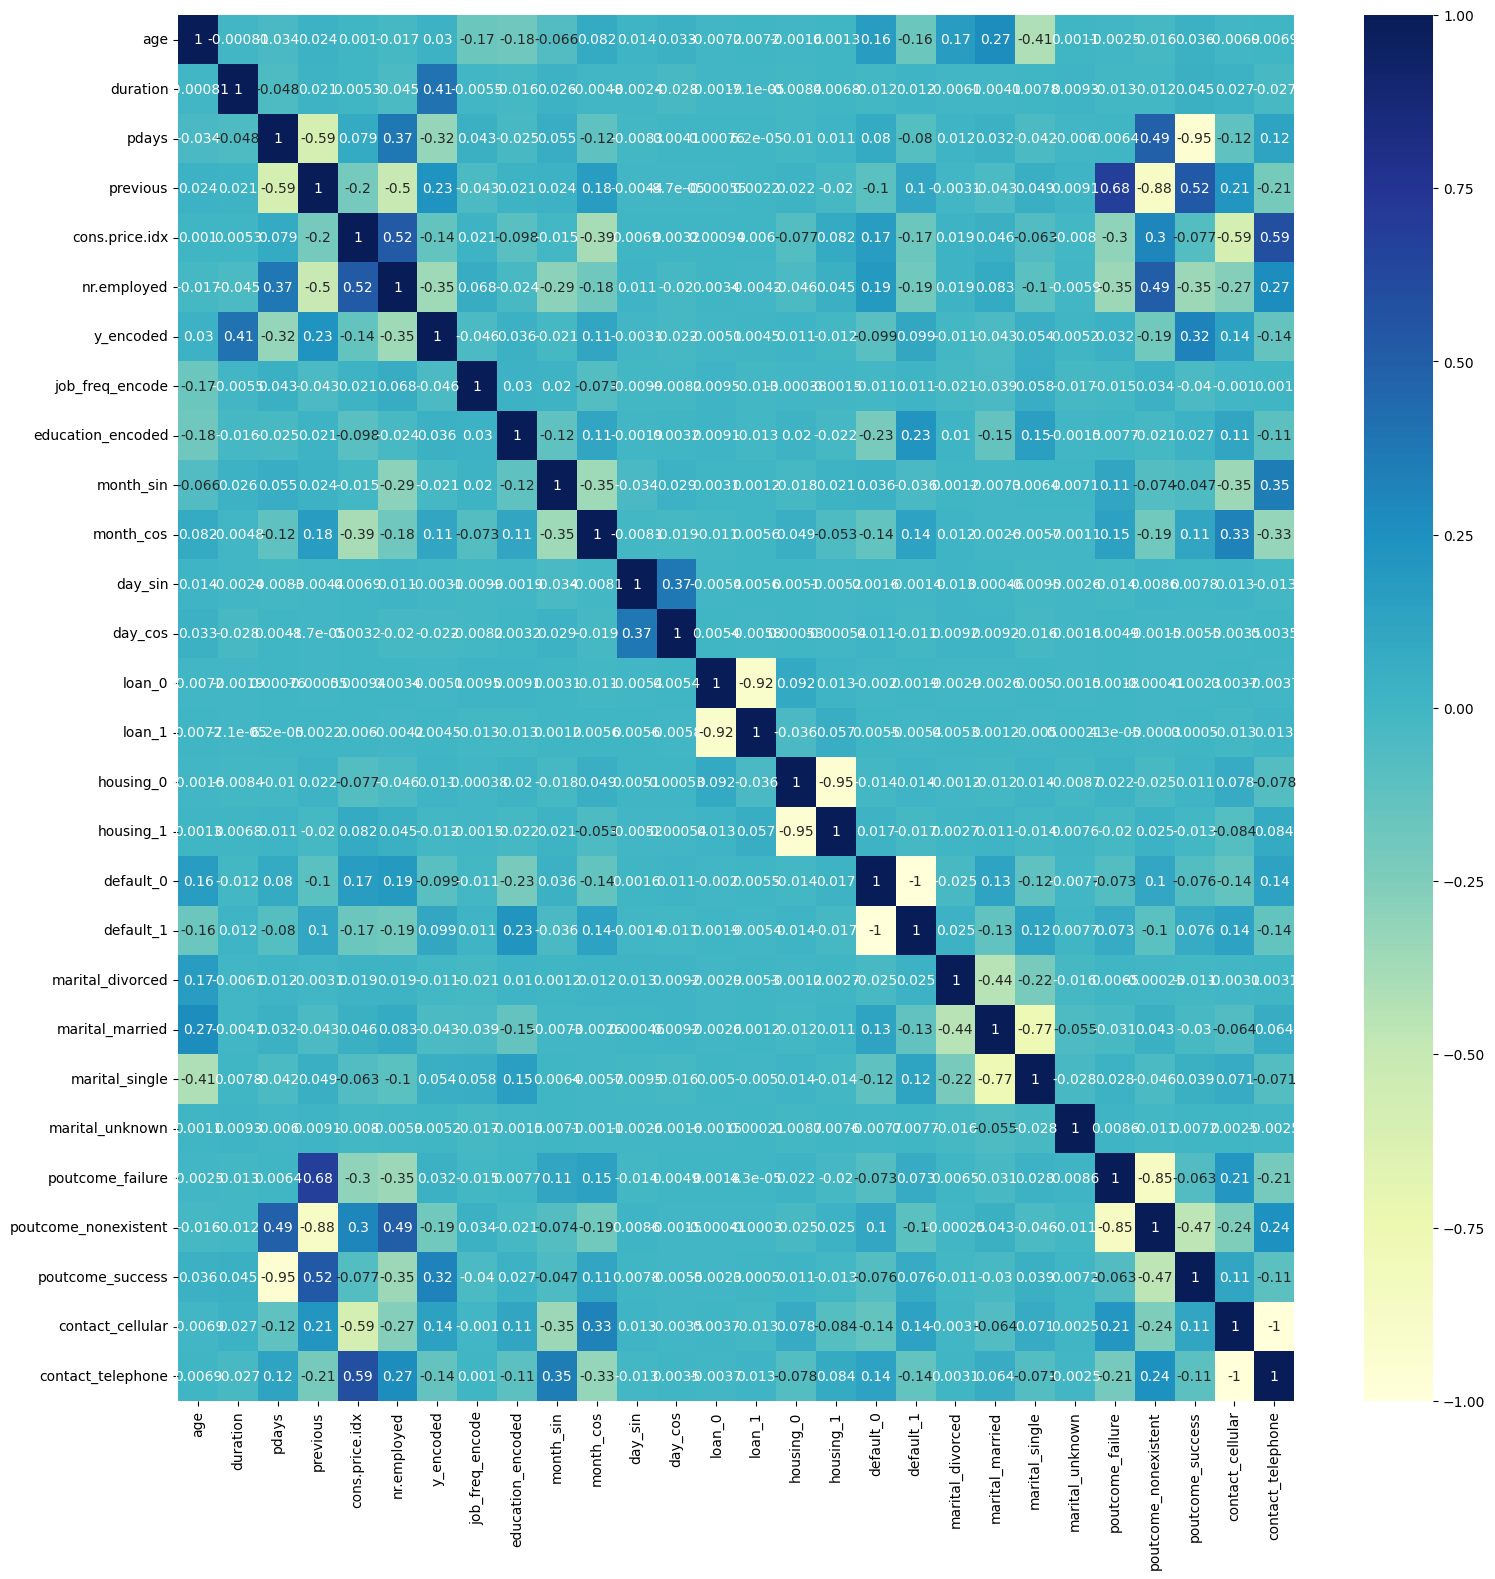

In [182]:
print(data.corr(numeric_only=True))
plt.figure(figsize=(18,18))
dataplot = sns.heatmap(data.corr(numeric_only=True), cmap='YlGnBu', annot=True)

In [183]:
X = data.drop(['y_encoded'], axis=1)
y = data[['y_encoded']]

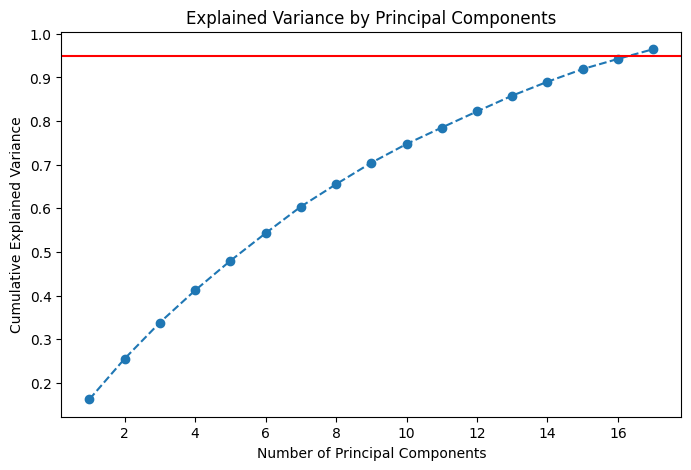

Number of components to retain for 95% variance: 17


In [184]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming 'X' is your feature matrix
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA(n_components=0.95)  # Retain 95% of the variance
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio from PCA
explained_variance = pca.explained_variance_ratio_

# Cumulative variance
cumulative_variance = np.cumsum(explained_variance)

# Plot explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.axhline(y=0.95, color='r', linestyle='-')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.show()

# Determine the number of components to retain
n_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Number of components to retain for 95% variance: {n_components}")



In [185]:
# Get the loadings for the retained components
loadings = pca.components_[:n_components]

# Create a DataFrame to better interpret feature contributions
import pandas as pd
loading_df = pd.DataFrame(loadings, columns=X.columns, 
                          index=[f"PC{i+1}" for i in range(n_components)])
loading_df


,age,duration,pdays,previous,cons.price.idx,nr.employed,job_freq_encode,education_encoded,month_sin,month_cos,...,default_1,marital_divorced,marital_married,marital_single,marital_unknown,poutcome_failure,poutcome_nonexistent,poutcome_success,contact_cellular,contact_telephone
PC1,0.019926,-0.018504,0.274297,-0.370404,0.295039,0.322315,0.024428,-0.079664,0.047109,-0.202873,...,-0.169602,-0.001622,0.077646,-0.082650,-0.006773,-0.278534,0.382502,-0.259589,-0.297984,0.297984
PC2,-0.218849,-0.016429,0.277665,-0.282853,-0.171362,0.101743,0.072912,0.229303,-0.204871,0.138780,...,0.301755,0.023070,-0.242910,0.248210,-0.002017,-0.139102,0.263094,-0.267503,0.265746,-0.265746
PC3,-0.312801,0.017506,-0.134878,0.090171,0.193277,-0.068586,0.080680,0.124382,0.242146,-0.206589,...,0.271812,0.029860,-0.361670,0.371044,0.014011,-0.002313,-0.067194,0.132456,-0.311519,0.311519
PC4,0.056400,0.003272,0.053215,-0.040679,-0.070505,0.025509,-0.029664,0.010159,-0.118370,0.099461,...,0.036488,0.007799,0.060867,-0.072305,0.006433,-0.007857,0.034605,-0.052879,0.120216,-0.120216
PC5,0.048199,0.005933,0.016512,-0.014879,-0.035400,0.027342,-0.008623,0.018120,-0.091656,0.059164,...,0.048024,-0.011508,0.084572,-0.084537,0.006407,-0.003079,0.012207,-0.018131,0.083770,-0.083770
PC6,-0.133116,-0.040814,0.404284,0.070883,-0.168636,-0.101770,0.077635,-0.095303,0.271753,-0.104502,...,-0.278955,0.012318,-0.200929,0.209127,0.007854,0.452754,-0.179376,-0.424268,0.047667,-0.047667
PC7,0.120350,-0.027684,0.252087,0.018372,-0.060272,-0.109428,-0.050751,-0.011258,0.256037,-0.027516,...,0.432580,-0.051991,0.368435,-0.364129,-0.001197,0.242929,-0.077871,-0.262795,-0.157461,0.157461
PC8,0.164717,-0.056957,0.025003,0.001109,0.013178,-0.012965,-0.103652,-0.004016,0.007839,-0.003461,...,0.024049,0.367512,-0.197173,-0.044791,0.013958,0.020301,-0.003913,-0.026924,-0.014003,0.014003
PC9,0.316706,-0.002840,0.035583,0.016498,0.044021,0.034494,-0.191002,-0.036988,-0.051275,0.095605,...,0.038959,0.699898,-0.329593,-0.137184,0.046505,0.045148,-0.020044,-0.038181,-0.052714,0.052714
PC10,0.084127,0.281873,-0.062697,-0.234375,-0.344126,-0.424500,-0.123550,-0.242032,0.490423,-0.169342,...,-0.007390,0.038705,-0.041382,0.011930,0.060423,-0.331450,0.245598,0.091988,0.108662,-0.108662


In [186]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import *

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=31, test_size=0.2)

rfc = RandomForestClassifier(random_state=31, n_jobs=-1)
rfc.fit(X_train, y_train)


# Checking scores
y_predict = rfc.predict(X_test)
y_predict_train = rfc.predict(X_train)
accuracy_test = accuracy_score(y_predict, y_test)
accuracy_train = accuracy_score(y_predict_train, y_train)
precision_test = precision_score(y_predict, y_test)
precision_train = precision_score(y_predict_train, y_train)
recall_test = recall_score(y_predict, y_test)
recall_train = recall_score(y_predict_train, y_train)
f1_test = f1_score(y_predict, y_test)
f1_train = f1_score(y_predict_train, y_train)

# Printing out results
# Predicting the accuracy score for Random Forest Classifier 
print('\n')
print('-------Random Forest Classifier-------')
print('accuracy for test is', accuracy_test)
print('accuracy for train is', accuracy_train)
print('\n')
print('precision for test is', precision_test)
print('precision for train is', precision_train)
print('\n')
print('recall for test is', recall_test)
print('recall for train is', recall_train)
print('\n')
print('f1 for test is', f1_test)
print('f1 for train is', f1_train)
print('\n')



-------Random Forest Classifier-------
accuracy for test is 0.9137931034482759
accuracy for train is 0.9999696417729205


precision for test is 0.47560975609756095
precision for train is 0.9997324056729997


recall for test is 0.6441441441441441
recall for train is 1.0


f1 for test is 0.5471938775510204
f1 for train is 0.9998661849324234




In [187]:
rf = RandomForestClassifier(random_state=31, n_jobs=-1)

params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200],
    'max_features': ['auto', 'sqrt', 'log2'],

}

from sklearn.model_selection import GridSearchCV

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 5,
                           n_jobs=-1, verbose=1, scoring="precision")

grid_search.fit(X_train, y_train)
print(grid_search.best_score_)
rf_best = grid_search.best_estimator_
print(rf_best)

Fitting 5 folds for each of 540 candidates, totalling 2700 fits
0.9239926739926739
RandomForestClassifier(max_depth=2, max_features='log2', min_samples_leaf=200,
                       n_estimators=200, n_jobs=-1, random_state=31)
